In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
from scipy.spatial import cKDTree as KDTree
from tqdm.notebook import tqdm

In [2]:
prod = '/home/aalvarez/Work/Data/SC8/PHZPRD_D3_3_NOMINAL_20211006T095754-37VOZ8CE-20211006-095828-003'

In [3]:
ref = Table.read(os.path.join(prod, 'ProductionInputEcdmHandler/star_reference_sample_dir.dir/phot.fits'), hdu=1)
len(ref)

500000

In [4]:
target = Table.read(os.path.join(prod, 'GalaxyFilteringTask/star_catalog.fits'))
len(target)

1691

In [5]:
truth = Table.read(os.path.join(prod, 'NnpzStarSed/output_file.fits'))

In [6]:
config = dict()
exec(open('/home/aalvarez/Work/Data/SC8/PHZPRD_D3_3_NOMINAL_20211006T095754-37VOZ8CE-20211006-095828-003/data/nnpz_star_sed_07Jun2021-094516.conf').read(), config)

In [7]:
# Missing bands!
ref_filters = config['reference_sample_phot_filters']
target_filters = config['target_catalog_filters']

In [74]:
ref_selected = []
target_selected = []
for rname, (tname, terr) in zip(ref_filters, target_filters):
    if np.isnan(target[tname]).sum() < 1:
        ref_selected.append(rname)
        target_selected.append((tname, terr))
#ref_selected = ref_selected[:5]
#target_selected = target_selected[:5]
print(len(ref_selected), ref_selected)

9 ['euclid/VIS', 'euclid/Y', 'euclid/J', 'euclid/H', 'subaru/z', 'megacam/u', 'megacam/r', 'jpcam/g', 'panstarrs/i']


# Normalize the target

In [75]:
target_photo = np.zeros((len(target), len(target_selected)))
for i, (fname, ferr) in enumerate(target_selected):
    target_photo[:, i] = target[fname]

In [76]:
target_norm = target_photo / np.sqrt(np.sum(target_photo**2, axis=1, keepdims=True))

# Normalize the reference sample

In [77]:
ref_photo = np.zeros((len(ref), len(ref_selected)))
for i, fname in enumerate(ref_selected):
    ref_photo[:, i] = ref[fname]

In [78]:
ref_norm = ref_photo / np.sqrt(np.sum(ref_photo**2, axis=1, keepdims=True))

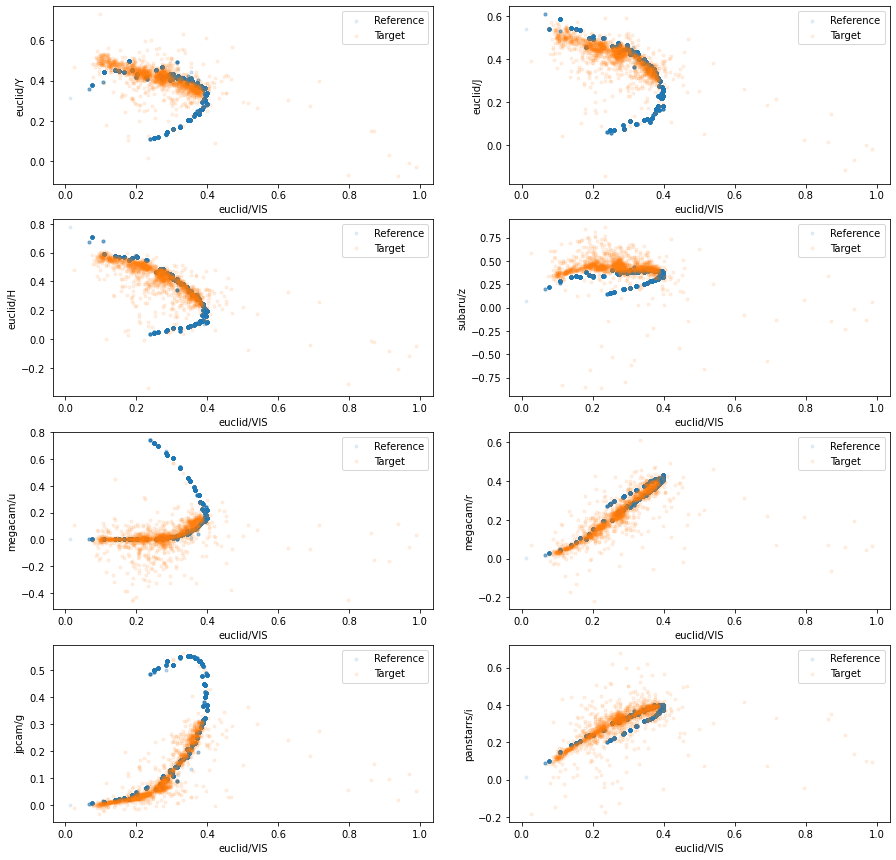

In [81]:
fig, axes = plt.subplots(ncols=2, nrows=len(ref_selected)//2, figsize=(15,15))
for i, ax in enumerate(axes.ravel()):
    fa = i + 1
    if fa >= len(ref_selected):
        break
    ax.scatter(ref_norm[:, 0], ref_norm[:, fa], marker='.', alpha=0.1, label='Reference')
    ax.scatter(target_norm[:,0], target_norm[:,fa], marker='.', alpha=0.1, label='Target')
    ax.legend()
    ax.set_xlabel(ref_selected[0])
    ax.set_ylabel(ref_selected[fa])

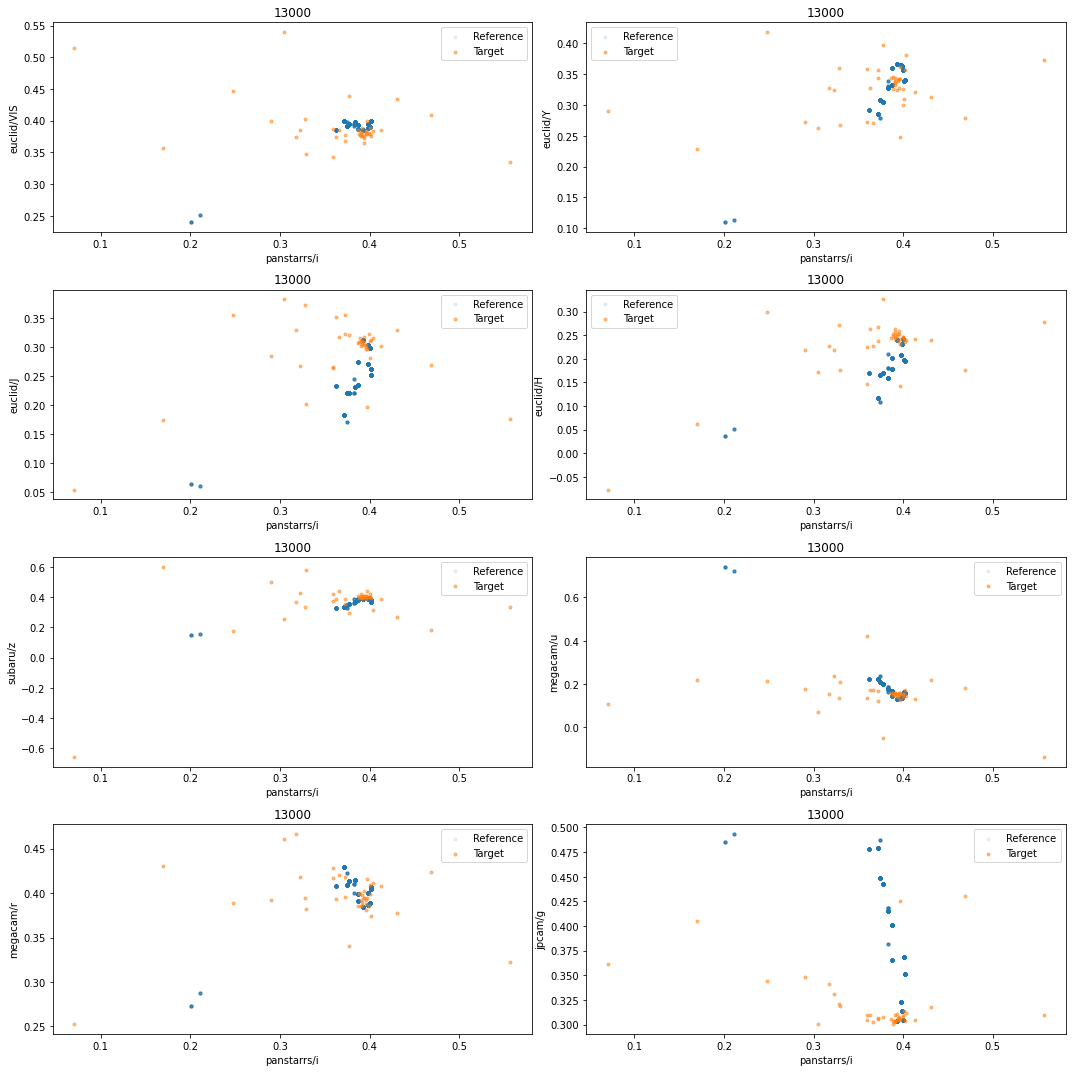

In [105]:
fig, axes = plt.subplots(ncols=2, nrows=len(ref_selected)//2, figsize=(15,15))
for i, ax in enumerate(axes.ravel()):
    fa = i
    if fa >= len(ref_selected):
        break
    m = (ref_norm[:, -2] >= 0.3) & (ref_norm[:,-2] <= 0.5)
    ax.scatter(ref_norm[m, -1], ref_norm[m, fa], marker='.', alpha=0.1, label='Reference')
    m2 = (target_norm[:,-2] >= 0.3) & (target_norm[:,-2]<=0.5)
    ax.scatter(target_norm[m2, -1], target_norm[m2,fa], marker='.', alpha=0.5, label='Target')
    ax.set_title(str(m.sum()))
    ax.legend()
    ax.set_xlabel(ref_selected[-1])
    ax.set_ylabel(ref_selected[fa])
plt.tight_layout()